In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
weekly = pd.read_csv('Weekly.csv')

In [3]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


## Problem 9

First, we produce output from R's `summary()` and a graphical correlation matrix.

In [8]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


<IPython.core.display.Javascript object>


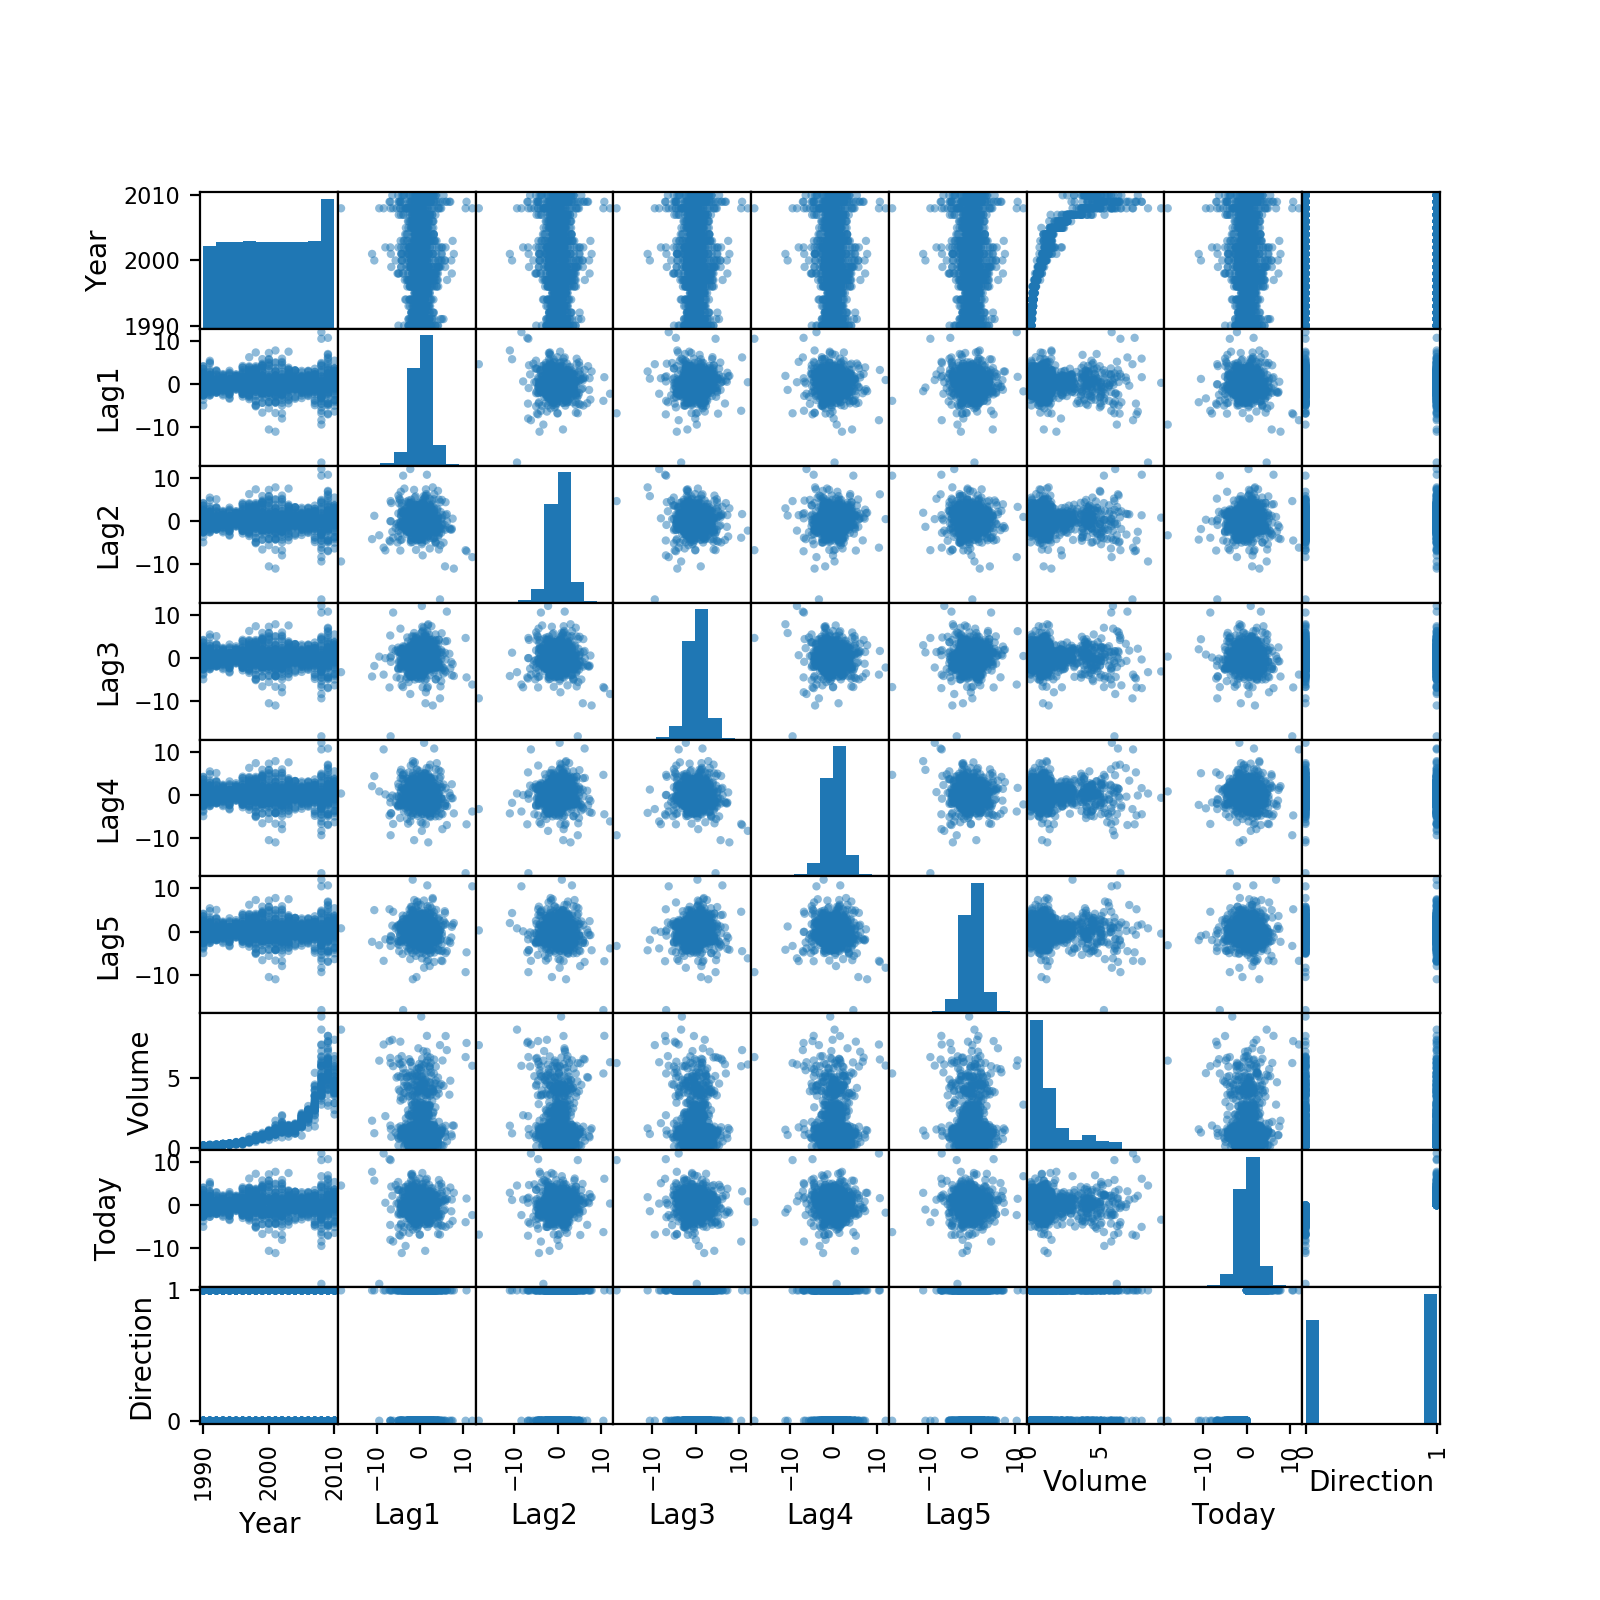

In [36]:
# weekly_clean = weekly
# weekly_clean.iloc[:, -1] = weekly_clean.iloc[:, -1].astype('category').cat.codes
# # Down = 0, Up = 1 
# fig, axes = plt.subplots(nrows = 8, ncols = 8, figsize = (8, 8))
# fig.subplots_adjust(hspace = .5)

# for col, facets in enumerate(axes):
#     for row, facet in enumerate(facets):
#         facet.scatter(weekly_clean.iloc[:, row], weekly_clean.iloc[:, col], s = 4)
    
#         facet.xaxis.set_visible(False)
#         facet.yaxis.set_visible(False)
pd.plotting.scatter_matrix(weekly, figsize = (8, 8))
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression
X = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']].values
y = weekly.Direction.values
logreg = LogisticRegression().fit(X, y)

/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Output from R's `summary()`:

```
Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4
```

Like for multiple linear regression, the standard error can be derived from the diagonal of the variance-covariance matrix of these coefficients. However, the variance-covariance matrix itself differs:

\begin{align}
\text{Var}(\hat{\beta}) &= \left(\textbf{X}^T\textbf{V}\textbf{X}\right)^{-1}
\end{align}

where $\textbf{V}$, the estimated variance, is a _N x N_ matrix with diagonals equal to $\hat{pi}_i(1 - \hat{pi}_i)$.

In [99]:
logreg.coef_

array([[-0.04117292,  0.05846974, -0.01599122, -0.02769998, -0.01440289,
        -0.02212844]])

The coefficients are slightly different, indicating that scikit-learn is likely not using Fisher scoring - perhaps Newton or gradient descent.

In [109]:
V = np.diagflat(np.product(logreg.predict_proba(X), axis = 1))
X_design = np.hstack([np.ones((len(X), 1)), X])
betahat_covmat = np.matrix(np.matmul(np.matmul(X_design.T, V), X_design)).I
betahat_se = np.sqrt(betahat_covmat.diagonal())
betahat_se

matrix([[0.08592114, 0.02640819, 0.0268634 , 0.02666072, 0.02646123,
         0.02638319, 0.03689749]])

In this case, adding the